# Lab 01: Basic defitions. Uninformed Search

## Overview of the lab
In this lab we will explore basic concepts of AI such state, state space and other. Following that Uninformed search strategies will be discussed.

# Basic Concepts and defitions


##State space
* **State** : a representation (formulation) of the task in the
process of its solution.
  * Initial State - presented with S
  * *Intermediate State* - presented with any capital letter except S
and G, any state in between
  * *Goal State* - presented with G, if there are more: G1, G2 etc.
* **Successor Function** (Operator) : obtaining one state from
another
* **Path Cost** : additive; e.g., sum of distances, number of
actions executed, etc.
* ❗***State Space*** : the totality of all possible states that can be
obtained from a given initial state.

*A solution is a sequence of actions leading from the initial state to a goal state*

## Representation of the State Space
The representation of the state space is a **graph** or a **tree**, where each state is represented as a **node** and the the successor function is represented as an **edge**.

When the state space is represented as a tree, it is called **Search Tree**
  * The *initial state* is the *root* of the tree
  * The *terminal states and the goal state* are represented with *leaves*

## Search strategies Evaluation
Strategies are evaluated along the following dimensions:
  * **Completeness:** does it always find solution if one exists?
  * **Optimality**: does it always find a least-cost solution?
  * **Time complexity**: bumber of nodes generated/expanded. We are interested in the worst case scenario
  * **Space Complexity**: maximum number of nodes in memory

Time and space complexity are measured in terms of:
* **b** – maximum branching factor of the search tree
* **d** – depth of the least-cost solution
* **m** – maximum depth of the state space (may be ∞)

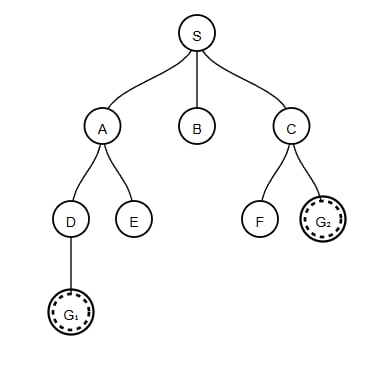

In the following example, considaring thet *the initial state S is at level 0*:
* b = 3 (each node has a maximum of 3 children)
* m = 3 (maximum depth)
* d = 2 (the nearest goal state is at level 2)

## Global Search VS Local Search
* ***Global Search:*** Search strategies that look all over the state space. If necessary, all states will be traversed
* ***Local Search:*** They only look at the local area, so they can only look at states in this area. If the solution is outside of it, they will not be able to find it.

*Generally Local Search is not used for finding a path from state
A to state B.*


## Local Search
* Local Search in Artificial Intelligence is an ***optimizing algorithm*** to find the optimal solution more ***quickly***.
* ***Local search algorithms*** are used when we care only about a solution but not the path to a solution.
* Local search is a *heuristic* method for ***solving computationally hard optimization problems***.
* Local search can be used on problems that can be formulated as finding a solution ***maximizing a criterion*** among a number of candidate solutions.
* Local search algorithms move from solution to solution in the space of candidate solutions (the search space) by applying local changes, until a solution deemed optimal is found or a time bound is elapsed.

# Uninformed (Blind) Search

## Uninformed Search Strategies

**Uninformed strategies** use only the information available in the problem definition. They have no information where the goal state might be (if one exists)
* Uninformed Search Strategies:
  * Depth-First Search (DFS)
  * Breadth-First Search (BFS)
  * Uniform-Cost Search (UCS)
  * Depth-Limited Search (DLS)
  * Iterative Deepening Search (IDS)

Python script for plotting graphs using networkx and matplotlib.pyplot libraries.

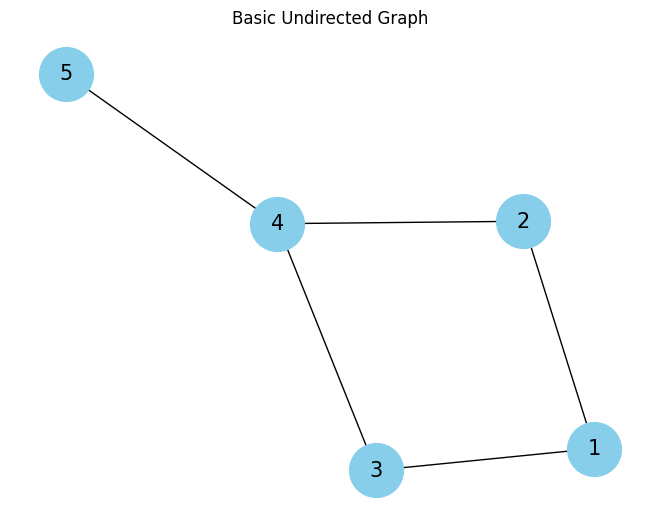

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a Graph object
G = nx.Graph()

# 2. Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# 3. Add edges (connections)
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# 4. Define a layout (positioning of nodes)
# Common layouts: spring_layout (force-directed), circular_layout, shell_layout
pos = nx.spring_layout(G)

# 5. Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue',
        node_size=1500, edge_color='k', linewidths=1, font_size=15)

# 6. Display the plot
plt.title("Basic Undirected Graph")
plt.show()

## DFS - Depth First Search
**Go Deep First**: DFS explores as far as possible down one branch of a tree or graph before it backtracks. It's like exploring a maze by always choosing the first available path until you hit a dead end.

**Uses a Stack**: The algorithm uses a stack data structure to keep track of the nodes it needs to visit. When it hits a dead end, it pops the most recently visited node off the stack and continues the search from there.



---


* ***Complete: No*** (fails in infinite-depth spaces), but complete finite spaces

*Example of infinite space* : ***Find a sequence of actions to transform an initial positive integer N into a target integer T using only the operations:***
  * Operation A: "Subtract 1" (i.e., x→x−1)
  * Operation B: "Multiply by 2" (i.e., x→2x)
  * Start Node (N): 5
  * Target Node (T): 10

Trap: 5 -(*2) -> 10 -(*2)-> 20 .... -> 60 -(*2)-> 120 ....  
Solution: If the current value exceeds the target value, return


---


* ***Optimal? - NO***


---


* ***Time complexity?*** $O(b^m)$

The goal state is the last node to visit, hence: $b^0 + b^1 + ... + b^m$



---

* **Space complexity?** ($O(bm)$)

Storage of the Current Path ($O(m)$)

Storage of the "Open" (Frontier) Nodes ($O(bm)$)



##BFS - Breadth First Search


---


* ***Complete: Yes*** if ($b < ∞$)
---


* ***Optimal? - Yes*** (if cost = 1per step); not optimal in general


---


* ***Time complexity?*** $O(b^{d+1})$

$b^0 + b^1 + ... + b^d + b (b^d - 1) = O(b^{d +1})$

If the goal state is the last one at level d, we would visit all nodes up to level d and would generate at most b children of each node of level d except for the goal state.

---

* **Space complexity?** ($O(b^{d+1})$)


---
* **Data structure: *Queue***


## Uniform-Cost Search (UCS)

 **Description** - Uniform cost search (UCS), our last strategy, is a strategy for exploration that always selects the lowest cost frontier node from the start node for expansion.

 **Frontier Representation** - To represent the frontier for UCS, the choice is usually a *heap-based priority queue*, where the priority for a given enqueued node $v$ is the path cost from the start node to $v$. Intuitively, a priority queue constructed in this manner simply reshuffles itself to maintain the desired ordering by path cost as we remove the current minimum cost path and replace it with its children.


---


Let us define the ***optimal path cost*** as **$C^*$**  and the ***minimal cost between two nodes*** in the state space graph as **ε**.

---


* ***Complete: Yes***

If a goal state exists, it must have some finite length shortest path; hence, UCS must eventually find this shortest length path.

---


* ***Optimal? - Yes*** -  

UCS is also optimal if we assume all edge costs are nonnegative. By construction, since we explore nodes in order of increasing path cost, we’re guaranteed to find the lowest-cost path to a goal state. The strategy employed in Uniform Cost Search is identical to that of Dijkstra’s algorithm, and the main difference is that UCS terminates upon finding a solution state instead of finding the shortest path to all states.

---


* ***Time complexity?*** $O(b^{\lceil C^*/ε \rceil})$

We must roughly explore all nodes at depths ranging from 1 to ${\lceil C^*/ε \rceil}$


---

* **Space complexity?** $O(b^{\lceil C^*/ε \rceil})$

## Depth-Limited Search (DLS)

=depth-first search with depth limit $l$ (nodes at depth level $l$ have no successors)
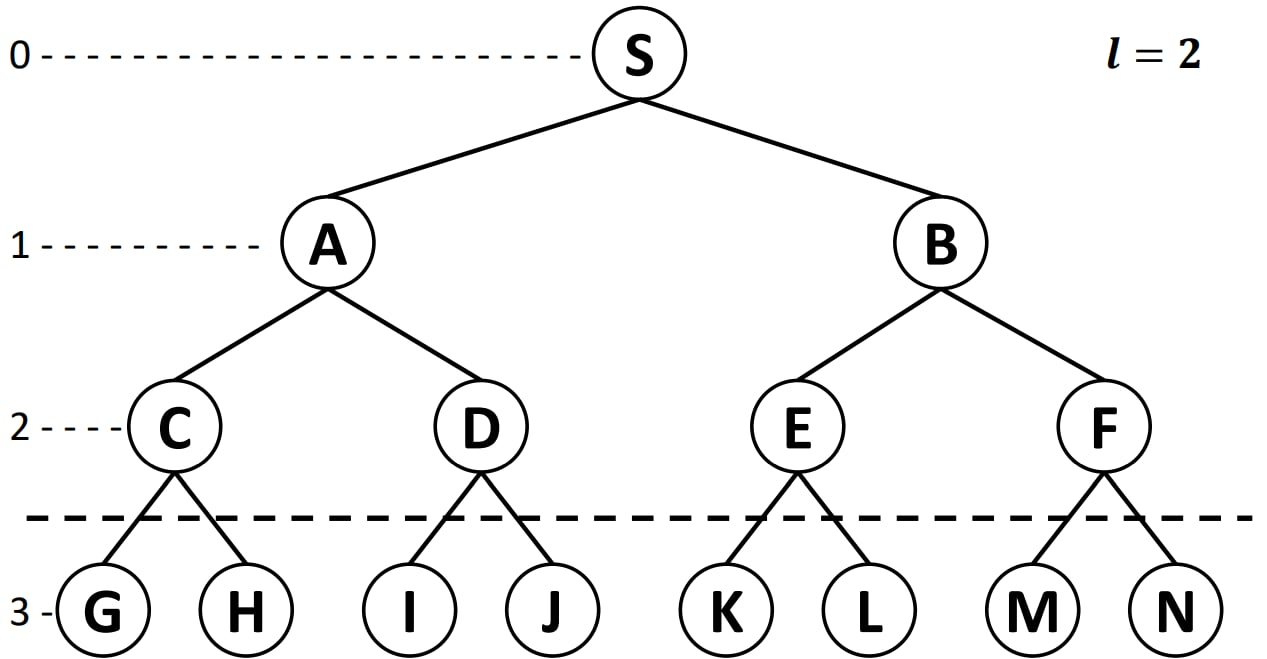


---


* ***Complete: Yes*** if $l \ge d$
---


* ***Optimal? - No***   
---


* ***Time complexity?*** $O(b^l)$
As before, but $m = l$

---

* **Space complexity?** $O(bl)$

## Iterative Deepening Search (IDS)

Iterate over the limit $l$ in Depth-Limited Search (DLS)

---


* ***Complete: Yes***

---


* ***Optimal? - Yes*** if step cost = 1 (Can be modified to explore uniform-cost tree)

The key to its optimality is that it effectively performs a level-by-level search of the state space, similar to BFS.

---


* ***Time complexity?*** $O(b^d)$

Since we are itearting over the limit $l = 0, 1, 2 ...$ then the time complexity is:

$b^0 + (b^0 + b^1) + (b^0 + b^1 + b^2) ... + (b^0 + b^1 + b^2 + \ldots + b^d)$
$= (d+1)b^0 + db^1 + \ldots + b^d = O(b^d)$

---

* **Space complexity?** $O(b^d)$ - it is a dfs

# IDS vs BFS

Let **b = 10** and **d = 5**, solution at far right leaf.

BFS time complexity is calculated the following way:
$b^0 + b^1 + ... + b^d + b (b^d - 1)$

IDS time complexity is calculated the following way:
$(d+1)b^0 + db^1 + \ldots + b^d$

Lets compare IDS and BFS numerically:

$N_{IDS} = 6 + 10*5 + 4*100 + 3*1000 + 2*10^4 + 10^5 = 123,456$
$N_{BFS} = 1 + 10 + 100 + 1000 + 10^4 + 10^5 + 999,990 = 1,111,101$

* IDS does better because other nodes at depth d are not expanded
* BFS can be modified to apply goal test when a node is generated

# Summay of Algorithms

| Algorithm | Complete | Optimal | Time Complexity | Space Complexity | Data structure|
 | ----- | ----- | ----- | ----- | ----- | ----- |
| Depth-First Search (DFS) | $No$ | $No$ | $O(b^m)$ | $O(bm)$ | Stack |
| Breadth-First Search (BFS) | $Yes^*$ (if b $\le ∞$ )|  $Yes^*$ (if cost step = 1)  | $O(b^{d+1})$ | $O(b^{d+1})$ | Queue |  
| Uniform-Cost Search (UCS) | $Yes$ | $Yes$ | $O(b^{\lceil C^*/ε \rceil})$ | $O(b^{\lceil C^*/ε \rceil})$ | Priority Queue  |
| Depth-Limited Search (IDS) | $Yes^*$ if $l\ge d$ | $Yes$ | $O(b^l)$ | $O(bl)$ | Stack  |
| Iterative Deepening Search (IDS) | $Yes$ | $Yes$ | $O(b^d)$ | $O(bd)$ | Stack  |